In [2]:
# library imports
import pandas as pd
import numpy as np
import os
import glob

Anna's Quick Notes (will document better later!)
- **zip_df** is the zip code-based dataframe with all the data we have so far, use this for modeling stuff!
- **click_df** is the clickstream data-only dataframe, use this for clickstream experimentation!
- **df** is a combination of location and demographics, but relevant data here other than demographics is already in zip_df

In [31]:
# Importing main location file and previewing
# DO NOT CHANGE NAME OF CSV FILE PATH! PLEASE ADJUST YOUR OWN FILES TO FIT
# Add a shortcut of the BTT AI Verizon #1 folder to YOUR drive- Pascale

all_files = glob.glob('location/**/*.csv', recursive=True)     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df.head()
print(len(df))

19121792


In [32]:
#Checking for null values in df
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

mdn_hash         0
startTime        0
duration         0
lat              0
lon              0
timeZone         0
make         24128
model         8893
zipCode          0
state            0
dtype: int64

In [33]:
#Checking for null values in 'make' and removing them
df = df.dropna(axis=0, subset=['make'])
df.head()

,mdn_hash,startTime,duration,lat,lon,timeZone,make,model,zipCode,state
0,d49479b328dafcb5,1696191010,0,32.770122,-117.165421,PDT,APPLE,IPHONE 14 PRO MAX 5GM,92108,CA
1,ef9a27408a5fff88,1696183692,0,33.907742,-118.369370,PDT,APPLE,IPHONE 13 PRO MAX 5GM,90250,CA
2,516f784c0cdde01e,1696175953,2895,34.506214,-117.398821,PDT,APPLE,IPHONE 12 PRO MAX 5GM,92392,CA
3,f0432df059f068e3,1696180781,0,33.758964,-118.081280,PDT,APPLE,IPHONE XR,90740,CA
4,b49ca7c9de3da89e,1696215352,0,32.841472,-116.787985,PDT,APPLE,IPHONE 12 PRO MAX 5GM,91901,CA


In [34]:
#Reseting the index
df = df.reset_index()
df = df.drop(columns="index")
df.head()

,mdn_hash,startTime,duration,lat,lon,timeZone,make,model,zipCode,state
0,d49479b328dafcb5,1696191010,0,32.770122,-117.165421,PDT,APPLE,IPHONE 14 PRO MAX 5GM,92108,CA
1,ef9a27408a5fff88,1696183692,0,33.907742,-118.369370,PDT,APPLE,IPHONE 13 PRO MAX 5GM,90250,CA
2,516f784c0cdde01e,1696175953,2895,34.506214,-117.398821,PDT,APPLE,IPHONE 12 PRO MAX 5GM,92392,CA
3,f0432df059f068e3,1696180781,0,33.758964,-118.081280,PDT,APPLE,IPHONE XR,90740,CA
4,b49ca7c9de3da89e,1696215352,0,32.841472,-116.787985,PDT,APPLE,IPHONE 12 PRO MAX 5GM,91901,CA


In [35]:
#Checking the number of unique 'mdn_hash'
print(len(df))
print(len(df["mdn_hash"].unique()))
print(len(df["zipCode"].unique()))

19097664
23395
7934


In [36]:
#Checking for null values in 'duration' and removing them
df['duration'] = df['duration'].replace(0, np.nan)
df = df.dropna(axis=0, subset=['duration'])

#Reseting the index
df = df.reset_index()
df = df.drop(columns="index")
df.head()


,mdn_hash,startTime,duration,lat,lon,timeZone,make,model,zipCode,state
0,516f784c0cdde01e,1696175953,2895.0,34.506214,-117.398821,PDT,APPLE,IPHONE 12 PRO MAX 5GM,92392,CA
1,a8a64ddeb665d00c,1696200271,3451.0,34.079270,-117.895949,PDT,APPLE,IPHONE 12 PRO MAX 5GM,91723,CA
2,788f40cab17b71f3,1696197043,414.0,34.062704,-117.562988,PDT,APPLE,IPHONE 13 PRO MAX 5GM,91761,CA
3,7e3a150a060a32b4,1696222028,3365.0,37.967321,-121.341689,PDT,APPLE,IPHONE 12 PRO 5GM,95204,CA
4,b3fb3bd8d6d4f776,1696153355,27337.0,34.136903,-118.389241,PDT,SAMSUNG,GALAXY S21 DOMESTIC IN 5GM,91604,CA


In [37]:
print(len(df["mdn_hash"].unique()))
print(len(df["zipCode"].unique()))

23394
3881


In [38]:
#Importing main demographics file and previewing
path = r'demographic\20231001'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
demo_df = pd.concat(df_from_each_file, ignore_index=True)
demo_df.head()

,mdn_hash,age,gender
0,2c1bcc653a0708e7,18 - 24,M
1,453bc5353062286d,NaN,NaN
2,aaf40c1d0da65046,NaN,F
3,aaf40c1d0da65046,NaN,F
4,10fc0b3a33aba9b7,75+,M


In [39]:
#Merge the demographics data to the location data on unique 'mdn_hash'
df = df.merge(demo_df, on = 'mdn_hash', how = 'right')
df.head()

,mdn_hash,startTime,duration,lat,lon,timeZone,make,model,zipCode,state,age,gender
0,2c1bcc653a0708e7,1.696154e+09,1442.0,37.707312,-121.982062,PDT,APPLE,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M
1,2c1bcc653a0708e7,1.696181e+09,1137.0,37.392623,-121.970905,PDT,APPLE,IPHONE 13 PRO MAX 5GM,95054,CA,18 - 24,M
2,2c1bcc653a0708e7,1.696168e+09,2502.0,37.707041,-121.983454,PDT,APPLE,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M
3,2c1bcc653a0708e7,1.696224e+09,1182.0,37.707198,-121.980391,PDT,APPLE,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M
4,2c1bcc653a0708e7,1.696228e+09,3527.0,37.702866,-121.985808,PDT,APPLE,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M


In [ ]:
#Importing main clickstream file and previewing
all_files = glob.glob('clickstream/**/*.csv', recursive=True)     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
click_df = pd.concat(df_from_each_file, ignore_index=True)
click_df.head()
print(len(click_df))

148302883


In [12]:
#Create a new column in click_df named "total data" that is the total of downstream and upstream data
click_df["total_data"] = click_df["upstream_data"] + click_df["downstream_data"]
click_df.head()

,mdn_hash,starttime,duration,tld,custom_tld,time_zone,upstream_data,downstream_data,total_data
0,9d47f2efd60074c5,1696186141,1,apple.com,gs-loc.apple.com,America/Los_Angeles,1662,6504,8166
1,f1d33b2f73242334,1696185958,120,ibytedtos.com,sf16-muse-va.ibytedtos.com,America/Los_Angeles,2056,2859,4915
2,04597a7df74ab326,1696184709,0,icloud.com,p71-contacts.icloud.com,America/Los_Angeles,2799,8689,11488
3,9e55f3a454405f50,1696182202,21,NaN,NaN,America/Los_Angeles,0,0,0
4,eb5da755091e7756,1696182058,1,apple.com,mesu.apple.com,America/Los_Angeles,2159,6662,8821


In [13]:
#Renaming the click_df columns 'starttime' to 'clickStartTime' and 'duration' to 'clickDuration'
click_df = click_df.rename(columns={"starttime": "clickStartTime", "duration": "clickDuration"})

In [14]:
#Checking for null values in click_df
nan_count = np.sum(click_df.isnull(), axis = 0)
nan_count

mdn_hash                  0
clickStartTime            0
clickDuration             0
tld                39191847
custom_tld         39191847
time_zone                 0
upstream_data             0
downstream_data           0
total_data                0
dtype: int64

In [15]:
click_df = click_df.dropna(axis=0, subset=['tld'])
click_df

,mdn_hash,clickStartTime,clickDuration,tld,custom_tld,time_zone,upstream_data,downstream_data,total_data
0,9d47f2efd60074c5,1696186141,1,apple.com,gs-loc.apple.com,America/Los_Angeles,1662,6504,8166
1,f1d33b2f73242334,1696185958,120,ibytedtos.com,sf16-muse-va.ibytedtos.com,America/Los_Angeles,2056,2859,4915
2,04597a7df74ab326,1696184709,0,icloud.com,p71-contacts.icloud.com,America/Los_Angeles,2799,8689,11488
4,eb5da755091e7756,1696182058,1,apple.com,mesu.apple.com,America/Los_Angeles,2159,6662,8821
5,8316e5886a85ad58,1696184621,134,tiktokcdn-us.com,v19.tiktokcdn-us.com,America/Los_Angeles,893,644,1537
...,...,...,...,...,...,...,...,...,...
148302875,ccd2d116c66e8395,1696371446,2,apple.com,weather-data.apple.com,America/Chicago,2480,9494,11974
148302878,d4a27d9b84611ec7,1696356170,4,icloud.com,p110-fmip.icloud.com,America/Los_Angeles,14543,8699,23242
148302879,8e7cf8767c3ba8cc,1696353767,0,apple.com,swallow.apple.com,America/Los_Angeles,4344,11832,16176
148302881,aae1edf19bdc11e9,1696367744,0,icloud.com,gateway.icloud.com,America/Denver,3531,8837,12368


In [16]:
#Reseting the index
click_df = click_df.reset_index()
click_df = click_df.drop(columns="index")

click_df.head()

,mdn_hash,clickStartTime,clickDuration,tld,custom_tld,time_zone,upstream_data,downstream_data,total_data
0,9d47f2efd60074c5,1696186141,1,apple.com,gs-loc.apple.com,America/Los_Angeles,1662,6504,8166
1,f1d33b2f73242334,1696185958,120,ibytedtos.com,sf16-muse-va.ibytedtos.com,America/Los_Angeles,2056,2859,4915
2,04597a7df74ab326,1696184709,0,icloud.com,p71-contacts.icloud.com,America/Los_Angeles,2799,8689,11488
3,eb5da755091e7756,1696182058,1,apple.com,mesu.apple.com,America/Los_Angeles,2159,6662,8821
4,8316e5886a85ad58,1696184621,134,tiktokcdn-us.com,v19.tiktokcdn-us.com,America/Los_Angeles,893,644,1537


In [17]:
click_df = click_df.drop(columns="custom_tld")
click_df = click_df.drop(columns="upstream_data")
click_df = click_df.drop(columns="downstream_data")

In [40]:
df = df.drop(columns="lat")
df = df.drop(columns="lon")
df = df.drop(columns="timeZone")
df = df.drop(columns="make")

In [41]:
df['under65'] = 0
df['under65'] = np.where(df['age'] != ("75+" or "65 - 74"), 1, df['under65'])
df['under65'] = np.where(df['age'].isnull(), 0, df['under65'])
df.head()

,mdn_hash,startTime,duration,model,zipCode,state,age,gender,under65
0,2c1bcc653a0708e7,1.696154e+09,1442.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1
1,2c1bcc653a0708e7,1.696181e+09,1137.0,IPHONE 13 PRO MAX 5GM,95054,CA,18 - 24,M,1
2,2c1bcc653a0708e7,1.696168e+09,2502.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1
3,2c1bcc653a0708e7,1.696224e+09,1182.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1
4,2c1bcc653a0708e7,1.696228e+09,3527.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1


In [42]:
age_df = df.drop_duplicates(subset=['mdn_hash'], keep='first')
age_df.head()

,mdn_hash,startTime,duration,model,zipCode,state,age,gender,under65
0,2c1bcc653a0708e7,1.696154e+09,1442.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1
92,453bc5353062286d,1.696221e+09,3628.0,IPHONE 12 5GM,95926,CA,NaN,NaN,0
175,aaf40c1d0da65046,1.696194e+09,428.0,IPHONE 12 5GM,93727,CA,NaN,F,0
483,10fc0b3a33aba9b7,1.696163e+09,1426.0,IPHONE SE 2,93544,CA,75+,M,0
554,169527a0b1312e64,1.696172e+09,3515.0,IPHONE 13 5GM,95747,CA,NaN,F,0


In [43]:
age_df = age_df.reset_index()

In [44]:
age_df['5gcomp'] = np.where(age_df.model.str.contains("5G"),1,0)
age_df

,index,mdn_hash,startTime,duration,model,zipCode,state,age,gender,under65,5gcomp
0,0,2c1bcc653a0708e7,1.696154e+09,1442.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1,1
1,92,453bc5353062286d,1.696221e+09,3628.0,IPHONE 12 5GM,95926,CA,NaN,NaN,0,1
2,175,aaf40c1d0da65046,1.696194e+09,428.0,IPHONE 12 5GM,93727,CA,NaN,F,0,1
3,483,10fc0b3a33aba9b7,1.696163e+09,1426.0,IPHONE SE 2,93544,CA,75+,M,0,0
4,554,169527a0b1312e64,1.696172e+09,3515.0,IPHONE 13 5GM,95747,CA,NaN,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21879,2028758,eea0600e27a5a6d1,1.696144e+09,5483.0,IPHONE 14 PRO 5GM,91406,CA,NaN,NaN,0,1
21880,2028848,077cee4d5dc4d84c,1.696167e+09,3532.0,IPHONE 13 5GM,93704,CA,NaN,NaN,0,1
21881,2028926,ccabf3c7bac4f5a4,1.696181e+09,3548.0,IPHONE 13 PRO MAX 5GM,90043,CA,NaN,NaN,0,1
21882,2029002,2e69a4a98c922423,1.696188e+09,3462.0,IPHONE 13 PRO MAX 5GM,93905,CA,25 - 34,M,1,1


In [23]:
click_df["clickEndTime"] = click_df["clickStartTime"] + click_df["clickDuration"]
click_df

,mdn_hash,clickStartTime,clickDuration,tld,time_zone,total_data,clickEndTime
0,9d47f2efd60074c5,1696186141,1,apple.com,America/Los_Angeles,8166,1696186142
1,f1d33b2f73242334,1696185958,120,ibytedtos.com,America/Los_Angeles,4915,1696186078
2,04597a7df74ab326,1696184709,0,icloud.com,America/Los_Angeles,11488,1696184709
3,eb5da755091e7756,1696182058,1,apple.com,America/Los_Angeles,8821,1696182059
4,8316e5886a85ad58,1696184621,134,tiktokcdn-us.com,America/Los_Angeles,1537,1696184755
...,...,...,...,...,...,...,...
109111031,ccd2d116c66e8395,1696371446,2,apple.com,America/Chicago,11974,1696371448
109111032,d4a27d9b84611ec7,1696356170,4,icloud.com,America/Los_Angeles,23242,1696356174
109111033,8e7cf8767c3ba8cc,1696353767,0,apple.com,America/Los_Angeles,16176,1696353767
109111034,aae1edf19bdc11e9,1696367744,0,icloud.com,America/Denver,12368,1696367744


In [24]:
df["endTime"] = df["startTime"] + df["duration"]
df

,mdn_hash,startTime,duration,model,zipCode,state,age,gender,under65,5gcomp,endTime
0,2c1bcc653a0708e7,1.696154e+09,1442.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1,1,1.696155e+09
1,2c1bcc653a0708e7,1.696181e+09,1137.0,IPHONE 13 PRO MAX 5GM,95054,CA,18 - 24,M,1,1,1.696182e+09
2,2c1bcc653a0708e7,1.696168e+09,2502.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1,1,1.696170e+09
3,2c1bcc653a0708e7,1.696224e+09,1182.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1,1,1.696226e+09
4,2c1bcc653a0708e7,1.696228e+09,3527.0,IPHONE 13 PRO MAX 5GM,94568,CA,18 - 24,M,1,1,1.696231e+09
...,...,...,...,...,...,...,...,...,...,...,...
2029148,b71240973d24472d,1.696323e+09,3616.0,GALAXY S22 PLUS 5GM,93422,CA,NaN,NaN,0,1,1.696327e+09
2029149,b71240973d24472d,1.696353e+09,229.0,GALAXY S22 PLUS 5GM,93422,CA,NaN,NaN,0,1,1.696353e+09
2029150,b71240973d24472d,1.696368e+09,17.0,GALAXY S22 PLUS 5GM,93422,CA,NaN,NaN,0,1,1.696368e+09
2029151,b71240973d24472d,1.696339e+09,1055.0,GALAXY S22 PLUS 5GM,93422,CA,NaN,NaN,0,1,1.696340e+09


In [25]:
'''
Click_df doesn't have zipcodes. We want to extract the zipcode of users from the main df. Users are linked in click_df and df by the unique 'mdn_hash".
However, the time range of data collection in click_df falls within the time range of data collection in df. Time ranges are values between starttimes and endtimes.

These lines of code checks, for a specific 'mdn_hash' in click_df, if the smaller time range from click_df is within any larger time range in df.
If so, the specific row with the time range in click_df gets assigned the zipcode of the time range from df.
'''
df_dict = {}

loc_dict = df.to_dict('records')
click_dict = click_df.to_dict('records')

for row in loc_dict:
    mdn = row['mdn_hash']
    start = row['startTime']
    end = row['endTime']
    zipcode = row['zipCode']

    if mdn not in df_dict:
        df_dict[mdn] = []
    
    df_dict[mdn].append((start, end, zipcode))

In [26]:
def match_zipcode(row):
    mdn = row['mdn_hash']
    click_start = row['clickStartTime']
    click_end = row['clickEndTime']

    if mdn in df_dict:
        matches = [(zip_code, start, end) for start, end, zip_code in df_dict[mdn] if start <= click_start and end >= click_end]
        if matches:
            return max(matches, key=lambda x: x[1])[0]
    return None

click_df['zipcode'] = click_df.apply(match_zipcode, axis=1)

click_df.head()

,mdn_hash,clickStartTime,clickDuration,tld,time_zone,total_data,clickEndTime,zipcode
0,9d47f2efd60074c5,1696186141,1,apple.com,America/Los_Angeles,8166,1696186142,None
1,f1d33b2f73242334,1696185958,120,ibytedtos.com,America/Los_Angeles,4915,1696186078,94901
2,04597a7df74ab326,1696184709,0,icloud.com,America/Los_Angeles,11488,1696184709,None
3,eb5da755091e7756,1696182058,1,apple.com,America/Los_Angeles,8821,1696182059,94301
4,8316e5886a85ad58,1696184621,134,tiktokcdn-us.com,America/Los_Angeles,1537,1696184755,93314


In [27]:
#Checking for null values in 'duration' and removing them
click_df['zipcode'] = click_df['zipcode'].replace("None", np.nan)
click_df = click_df.dropna(axis=0, subset=['zipcode'])

#Reseting the index
click_df = click_df.reset_index()
click_df = click_df.drop(columns="index")
click_df.head()

,mdn_hash,clickStartTime,clickDuration,tld,time_zone,total_data,clickEndTime,zipcode
0,f1d33b2f73242334,1696185958,120,ibytedtos.com,America/Los_Angeles,4915,1696186078,94901
1,eb5da755091e7756,1696182058,1,apple.com,America/Los_Angeles,8821,1696182059,94301
2,8316e5886a85ad58,1696184621,134,tiktokcdn-us.com,America/Los_Angeles,1537,1696184755,93314
3,1d2f9134899da04e,1696187199,31,apple.com,America/Los_Angeles,7750,1696187230,95670
4,ba3e39bb4b8a9091,1696189377,0,apple.com,America/Los_Angeles,47814,1696189377,92805


In [28]:
print(len(click_df))

51546102


In [29]:
click_df = click_df.drop(columns="time_zone")
click_df = click_df.drop(columns="clickStartTime")
click_df = click_df.drop(columns="clickEndTime")

In [32]:
click_df.to_hdf('click_df.h5', 'data')  

In [33]:
len(click_df['tld'].unique())

69557

In [45]:
#importing one-hot-encoded websites calssifications
websites_classification = pd.read_hdf("clickstreams_classified.h5")

websites_classification.drop(columns=['mdn_hash', 'tld',
       'total_data', 'zipcode', 'category_E-Commerce', 'category_Food', 'category_Forums', 'category_Health and Fitness', 'category_Law and Government', 'category_News', 'category_Photography', 'category_Social Networking and Messaging', 'category_Sports', 'category_Travel', 'mdn_hash'], inplace = True)

websites_classification.head()

,clickDuration,category_Adult,category_Business/Corporate,category_Computers and Technology,category_Education,category_Games,category_Streaming Services
0,120,0,0,0,0,0,0
1,1,0,1,0,0,0,0
2,134,0,0,0,0,0,0
3,31,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [46]:
websites_classification['category_Business/Corporate'] = np.where(websites_classification['category_Business/Corporate'] == 1, websites_classification['clickDuration'], websites_classification['category_Business/Corporate'])
websites_classification['category_Computers and Technology'] = np.where(websites_classification['category_Computers and Technology'] == 1, websites_classification['clickDuration'], websites_classification['category_Computers and Technology'])
websites_classification['category_Education'] = np.where(websites_classification['category_Education'] == 1, websites_classification['clickDuration'], websites_classification['category_Education'])
websites_classification['category_Games'] = np.where(websites_classification['category_Games'] == 1, websites_classification['clickDuration'], websites_classification['category_Games'])
websites_classification['category_Streaming Service'] = np.where(websites_classification['category_Streaming Services'] == 1, websites_classification['clickDuration'], websites_classification['category_Streaming Services'])

In [47]:
websites_classification.drop(columns=['clickDuration'], inplace=True)
websites_classification.head(10)

,category_Adult,category_Business/Corporate,category_Computers and Technology,category_Education,category_Games,category_Streaming Services,category_Streaming Service
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,31,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0
9,0,20,0,0,0,0,0


In [48]:
click_df = pd.read_hdf("click_df.h5")

In [49]:
click_df = click_df.join(websites_classification)
click_df.head()

,mdn_hash,clickDuration,tld,total_data,zipcode,category_Adult,category_Business/Corporate,category_Computers and Technology,category_Education,category_Games,category_Streaming Services,category_Streaming Service
0,f1d33b2f73242334,120,ibytedtos.com,4915,94901,0,0,0,0,0,0,0
1,eb5da755091e7756,1,apple.com,8821,94301,0,1,0,0,0,0,0
2,8316e5886a85ad58,134,tiktokcdn-us.com,1537,93314,0,0,0,0,0,0,0
3,1d2f9134899da04e,31,apple.com,7750,95670,0,31,0,0,0,0,0
4,ba3e39bb4b8a9091,0,apple.com,47814,92805,0,0,0,0,0,0,0


# Creating ziplist

In [50]:
#Make a list of all uniques zipcodes in click_df
ziplist = click_df["zipcode"].unique()

In [52]:
from tqdm.auto import tqdm

c:\Users\Annq Zhou\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
'''
These lines of code create a new dataframe named 'zip_df' that contains the zipcodes from click_df, the number of users per zipcode,
the total duration of clicktream data acquisition per zipcode,the total data transfered per zipcode, and the total duration of location aquisition per zipcode
'''
userdict = {}
progress_bar = tqdm(range(len(ziplist)))

for i in ziplist:
  zip_users = click_df.loc[click_df['zipcode'] == i]
  userdict[i] = []
  df_users = df.loc[df["zipCode"] == i]
  age_users = age_df.loc[age_df["zipCode"] == i]
  user_len = len(zip_users["mdn_hash"].unique())
  user_under75 = age_users["under65"].sum()
  compatible = age_users["5gcomp"].sum()

  for x in df_users["mdn_hash"].unique():
    if x not in zip_users["mdn_hash"].unique():
      user_len += 1

  userdict[i].append(user_len)
  userdict[i].append(user_under75)
  userdict[i].append(compatible)
  userdict[i].append(zip_users['clickDuration'].sum())
  userdict[i].append(zip_users['total_data'].sum())
  userdict[i].append(df_users['duration'].sum())
  userdict[i].append(zip_users['category_Streaming Services'].sum())
  userdict[i].append(zip_users['category_Business/Corporate'].sum())
  userdict[i].append(zip_users['category_Computers and Technology'].sum())
  userdict[i].append(zip_users['category_Education'].sum())
  userdict[i].append(zip_users['category_Games'].sum())
  
  progress_bar.update(1)

100%|██████████| 3481/3481 [5:37:23<00:00,  5.24s/it]  

In [54]:
zip_df = pd.DataFrame.from_dict(userdict, orient="index", columns=["nUsers", "under75", "5g_comp", "totalClickDur", "totalData", "totalDur", "siteStream", "siteWork", "siteTech", "siteEdu", "siteGames"])
zip_df = zip_df.reset_index()
zip_df = zip_df.rename(columns={"index": "zipcode"})
zip_df.head()

,zipcode,nUsers,under75,5g_comp,totalClickDur,totalData,totalDur,siteStream,siteWork,siteTech,siteEdu,siteGames
0,94901,139,14,16,2601644,7653206756,5264450.0,1507,464779,595246,1398,22629
1,94301,115,3,9,1281872,4705223270,3032301.0,542,270067,206428,1806,3447
2,93314,90,12,17,2170413,10835445166,8971818.0,925,303684,330358,1545,64313
3,95670,151,9,19,7235480,15071271780,7878285.0,5344,978273,1625113,2888,39513
4,92805,484,18,31,6990117,14699429551,7970096.0,3463,799693,1796427,2839,52413


In [8]:
zip_df.to_hdf('zip_df.h5', 'data')  

In [59]:
directory_path = 'facilities'

# Finding infrastructure data, and merging it to zip_df
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    print(filename)

    infrastructure_dataset = pd.read_csv(file_path)
    infrastructure_dataset['zipcode'] = infrastructure_dataset['zipcode'].astype('string')

    # Merging critical infrastructure dataframe with original dataframe
    zip_df = zip_df.merge(infrastructure_dataset, on = 'zipcode', how = 'left')

colleges_zip.csv
convention_zip.csv
facilities_zip.csv
headquaters_zip.csv
hospitals_zip.csv
libraries_zip.csv
schools_zip.csv


In [71]:
zip_df.fillna(0, inplace=True)

zip_df = zip_df.rename(columns={"zipcode": "zipCode", "number of colleges": "numColleges", "number of convention centers":"numConventions", "number of facilities":"numFacilities",
                                "number of headquarters":"numHQs", "number of hospitals": "numMedical", "number of libraries":"numLibs", "number of schools": "numSchools"})

zip_df

AttributeError: 'NoneType' object has no attribute 'astype'

In [6]:
zip_df = zip_df.rename(columns={"under75": "under65"})

In [3]:
zip_df = pd.read_hdf('zip_df.h5') 

In [7]:
zip_df

,zipcode,nUsers,under65,5g_comp,totalClickDur,totalData,totalDur,siteStream,siteWork,siteTech,siteEdu,siteGames,number of colleges,number of convention centers,number of facilities,number of headquarters,number of hospitals,number of libraries,number of schools,Cluster
0,94901,139,14,16,2601644,7653206756,5264450.0,1507,464779,595246,1398,22629,1,0,11,0,0,4,11,0
1,94301,115,3,9,1281872,4705223270,3032301.0,542,270067,206428,1806,3447,0,0,4,0,1,4,7,0
2,93314,90,12,17,2170413,10835445166,8971818.0,925,303684,330358,1545,64313,0,0,2,0,0,0,7,2
3,95670,151,9,19,7235480,15071271780,7878285.0,5344,978273,1625113,2888,39513,0,0,14,0,0,2,22,2
4,92805,484,18,31,6990117,14699429551,7970096.0,3463,799693,1796427,2839,52413,0,1,47,0,3,2,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,95935,2,0,0,0,11086,53356.0,0,0,0,0,0,0,0,0,0,0,0,1,0
3477,97221,1,0,0,0,15404,53.0,0,0,0,0,0,0,0,2,0,0,0,4,0
3478,73950,1,0,0,0,3341,3.0,0,0,0,0,0,0,0,0,0,0,0,2,0
3479,95689,3,0,0,1,1125,2535.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [74]:
zip_df['number of colleges'] = zip_df['number of colleges'].astype('int')


In [75]:
zip_df['number of convention centers'] = zip_df['number of convention centers'].astype('int')
zip_df['number of facilities'] = zip_df['number of facilities'].astype('int')
zip_df['number of headquarters'] = zip_df['number of headquarters'].astype('int')
zip_df['number of hospitals'] = zip_df['number of hospitals'].astype('int')
zip_df['number of libraries'] = zip_df['number of libraries'].astype('int')
zip_df['number of schools'] = zip_df['number of schools'].astype('int')


In [84]:
zip_df

,zipcode,nUsers,under75,5g_comp,totalClickDur,totalData,totalDur,siteStream,siteWork,siteTech,siteEdu,siteGames,number of colleges,number of convention centers,number of facilities,number of headquarters,number of hospitals,number of libraries,number of schools,Cluster
0,94901,139,14,16,2601644,7653206756,5264450.0,1507,464779,595246,1398,22629,1,0,11,0,0,4,11,0
1,94301,115,3,9,1281872,4705223270,3032301.0,542,270067,206428,1806,3447,0,0,4,0,1,4,7,0
2,93314,90,12,17,2170413,10835445166,8971818.0,925,303684,330358,1545,64313,0,0,2,0,0,0,7,2
3,95670,151,9,19,7235480,15071271780,7878285.0,5344,978273,1625113,2888,39513,0,0,14,0,0,2,22,2
4,92805,484,18,31,6990117,14699429551,7970096.0,3463,799693,1796427,2839,52413,0,1,47,0,3,2,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,95935,2,0,0,0,11086,53356.0,0,0,0,0,0,0,0,0,0,0,0,1,0
3477,97221,1,0,0,0,15404,53.0,0,0,0,0,0,0,0,2,0,0,0,4,0
3478,73950,1,0,0,0,3341,3.0,0,0,0,0,0,0,0,0,0,0,0,2,0
3479,95689,3,0,0,1,1125,2535.0,0,1,0,0,0,0,0,0,0,0,0,0,0


# PCA - MUYA START HERE!!

In [ ]:
# library imports
import pandas as pd
import numpy as np
import os
import glob

In [9]:
zip_df = pd.read_hdf('zip_df.h5') 
zip_df

,zipcode,nUsers,under65,5g_comp,totalClickDur,totalData,totalDur,siteStream,siteWork,siteTech,siteEdu,siteGames,number of colleges,number of convention centers,number of facilities,number of headquarters,number of hospitals,number of libraries,number of schools,Cluster
0,94901,139,14,16,2601644,7653206756,5264450.0,1507,464779,595246,1398,22629,1,0,11,0,0,4,11,0
1,94301,115,3,9,1281872,4705223270,3032301.0,542,270067,206428,1806,3447,0,0,4,0,1,4,7,0
2,93314,90,12,17,2170413,10835445166,8971818.0,925,303684,330358,1545,64313,0,0,2,0,0,0,7,2
3,95670,151,9,19,7235480,15071271780,7878285.0,5344,978273,1625113,2888,39513,0,0,14,0,0,2,22,2
4,92805,484,18,31,6990117,14699429551,7970096.0,3463,799693,1796427,2839,52413,0,1,47,0,3,2,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,95935,2,0,0,0,11086,53356.0,0,0,0,0,0,0,0,0,0,0,0,1,0
3477,97221,1,0,0,0,15404,53.0,0,0,0,0,0,0,0,2,0,0,0,4,0
3478,73950,1,0,0,0,3341,3.0,0,0,0,0,0,0,0,0,0,0,0,2,0
3479,95689,3,0,0,1,1125,2535.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
zip_df_new = zip_df.drop('zipcode', axis =1)

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 3)
zip_df_vectors = pca.fit_transform(zip_df_new)
explained_variance = pca.explained_variance_ratio_

zip_df_pca = pd.DataFrame(data=zip_df_vectors, columns=['PC1', 'PC2','PC3'])
zip_df_pca.head()

,PC1,PC2,PC3
0,4.603682e+09,-3.106859e+06,-9.032406e+04
1,1.655698e+09,-1.121989e+06,-2.564599e+05
2,7.785921e+09,-5.530954e+06,-2.271763e+06
3,1.202175e+10,-5.976903e+06,2.808812e+06
4,1.164991e+10,-6.037408e+06,2.580064e+06


In [19]:
zip_df_pca

,PC1,PC2,PC3,Cluster
0,4.603682e+09,-3.106859e+06,-9.032406e+04,0
1,1.655698e+09,-1.121989e+06,-2.564599e+05,0
2,7.785921e+09,-5.530954e+06,-2.271763e+06,2
3,1.202175e+10,-5.976903e+06,2.808812e+06,2
4,1.164991e+10,-6.037408e+06,2.580064e+06,2
...,...,...,...,...
3476,-3.049515e+09,1.128909e+06,2.137959e+04,0
3477,-3.049511e+09,1.176701e+06,4.497655e+04,0
3478,-3.049523e+09,1.176743e+06,4.499905e+04,0
3479,-3.049525e+09,1.174472e+06,4.387918e+04,0


In [18]:
len(zip_df_pca)

3481

## K Means

In [12]:
import pandas as pd, numpy as np
import seaborn as sns
#sns.set_theme(style ="whitegrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
# Fit kmeans with a range of values
wcss = []
#Within-Cluster Sum of Squares (WCSS)
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=123)
    # k-means++ is a good way to spread out the centroids
    kmeans.fit(zip_df_pca)
    wcss.append(kmeans.inertia_)
    #kmeans.inertia_ is Within-Cluster Sum of Squares (WCSS)

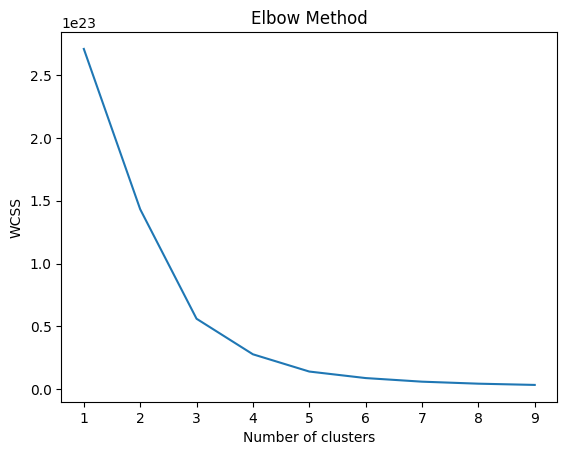

In [14]:
# Plot the elbow graph
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Perform clustering and get centroids
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=123)
clusters = kmeans.fit_predict(zip_df_pca)
centroids = kmeans.cluster_centers_

# Add clusters to your DataFrame
zip_df_pca['Cluster'] = clusters

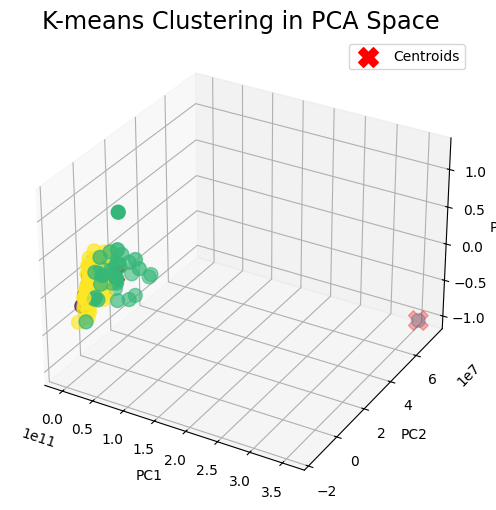

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

##fig = plt.figure(figsize=(16, 6))
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot using the first three PCA components
ax.scatter(zip_df_pca['PC1'], zip_df_pca['PC2'], zip_df_pca['PC3'],
           c=zip_df_pca['Cluster'], cmap='viridis', s=100)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           marker='X', s=200, c='r', label='Centroids')

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("K-means Clustering in PCA Space", fontsize='xx-large')

# Show the legend
plt.legend()

# Show the plot
plt.show()



### Attributes for each cluster

In [23]:

zip_df['Cluster'] = clusters

# Now you can calculate statistics for each cluster in the original data
cluster_stats = zip_df.groupby('Cluster').mean(numeric_only=True)

print(cluster_stats)


             nUsers    under65    5g_comp  totalClickDur     totalData  \
Cluster                                                                  
0         20.301803   1.573324   2.161279   2.954526e+05  8.390948e+08   
1         28.000000   9.000000  10.000000   2.145067e+06  3.601991e+11   
2        204.025641  20.743590  28.897436   7.524380e+06  4.175536e+10   
3        143.645418  12.934263  18.131474   3.394497e+06  1.227220e+10   

             totalDur   siteStream      siteWork      siteTech      siteEdu  \
Cluster                                                                       
0        7.472814e+05   192.445049  4.910109e+04  6.603846e+04   401.509017   
1        2.895359e+06  1239.000000  2.042490e+05  5.196410e+05  1077.000000   
2        9.874360e+06  6435.615385  1.123164e+06  1.530013e+06  7282.538462   
3        6.075814e+06  2250.085657  5.323340e+05  6.987881e+05  4370.581673   

            siteGames  number of colleges  number of convention centers  \
Clust

In [26]:
cluster_2_zip_codes = zip_df[zip_df['Cluster'] == 2]['zipcode']

# Print the zip codes in cluster 0
print(cluster_2_zip_codes)

18     92802
28     92123
30     92037
42     92503
63     92101
66     92335
72     95624
94     91730
109    92311
110    93292
115    93906
117    95355
130    95746
142    93308
156    92880
158    92336
161    90640
203    91761
215    95327
231    92407
237    92882
253    95501
261    92694
271    95076
281    93458
368    91950
370    93631
396    92591
411    92618
421    95630
471    91739
507    94558
670    94607
674    92113
706    95386
736    95366
747    93638
836    95648
846    92108
Name: zipcode, dtype: object


In [27]:
len(cluster_2_zip_codes)

39

Priority zone is 2

## DBSCAN

*DBSCAN, or Density-Based Spatial Clustering of Applications with Noise,* is a renowned clustering algorithm, predominantly used to form distinctive groups or clusters within a data set. The term "density" within DBSCAN refers to the proximity or closeness of data points to one another.

The working mechanism of DBSCAN revolves around two primary parameters: epsilon (eps), defining the radius to determine the closeness of points, and the minimum samples, indicating the minimum number of samples required to form a cluster. Within the algorithm, the core point is central and represents high density, where a sufficient number of points are enclosed within the epsilon radius.

A border point is defined as a point within the epsilon radius of a core point, but with fewer neighboring points than the minimum required to form a dense region.

Any point not part of a cluster or not close enough to form one is termed a noise point, representing outliers or anomalies within the data. Unlike many other clustering methods, DBSCAN does not necessitate specifying the number of clusters beforehand. Instead, it autonomously discovers clusters based on the density of data points. This unique trait makes it especially suited for scenarios where the clusters are of similar densities. However, it may struggle in situations where clusters have varying densities and in high-dimensional spaces, causing it to be less effective. The objective of DBSCAN is to identify areas with high densities of data points, making it ideal for clustering geographical data. In contrast, K-Means, another clustering algorithm, is often better suited for clustering behavioral data due to its distinct methodology. While both DBSCAN and K-Means are designed to group data points with similar attributes, they have their unique challenges. The fundamental difficulty with K-Means is determining the optimal number of clusters and its sensitivity to noise and outliers. cluster the compressed two-dimensional dataset (which includes the zipcode already), and each point is associated with a zipcode, pull that out every user has multiple locations, to maximum home vs. work

In [28]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

#Fitting the DBSCAN Model
db = DBSCAN(eps=20000, min_samples=10).fit(zip_df_pca)
labels = db.labels_

# Number of clusters in labels, ignoring noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 3022


We will determine the number of clusters and noise based on the sillhouette score methods.

In [29]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(zip_df_pca, labels):.3f}")

Silhouette Coefficient: -0.455


### Silhouette Scoring Method

The silhouette scoring method is utilized to measure the accuracy of clusters formed in a dataset. The silhouette coefficient, a metric in this method, ranges between -1 and 1 and is indicative of how well the clusters are formed. A positive silhouette coefficient implies well-partitioned clusters, while a negative one indicates poorly defined clusters.


#### Components of Silhouette Scoring

The silhouette score is defined by two essential metrics:
1. **Cohesion**: It measures how similar the items within each cluster are. Cohesion is calculated as the mean of all the distances between each data point and the rest of the points in the same cluster. This distance can be computed using different methods, such as Euclidean or Manhattan distance.
  
2. **Separation**: This metric assesses how distinct each cluster is from the others. To compute separation, the mean of all the distances from the points outside the cluster to the selected data point is found, and the minimum of these mean distances is taken as the separation value.

#### Calculating Silhouette Score

For each data point, the silhouette score is calculated using the formula:

**Silhouette Score = (separation mean - cohesion mean)/max(separation mean,cohesion mean)**

The denominator in this formula serves to normalize the score.

Each data point in the observation has one silhouette coefficient, and the overall silhouette coefficient for a set of clusters is the mean of the silhouette coefficients of all data points. A higher mean silhouette coefficient indicates better-defined clusters.

#### Interpretation of the Score

A silhouette score close to 1 indicates a good level of separation between the clusters, suggesting that the clustering algorithm has performed well. Conversely, a score close to -1 signifies that the clusters are not well-separated, and the data points have been assigned to the wrong clusters. In essence, a good silhouette score is positive, and a bad one is negative.

### Plot the DBSCAN clusters

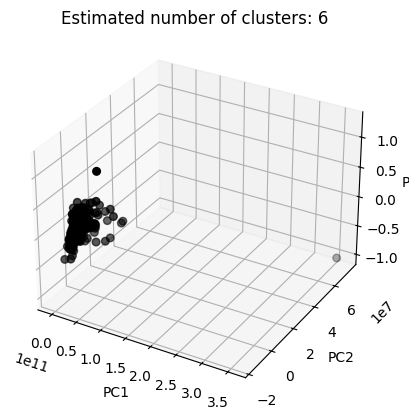

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure()

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xyz = zip_df_pca[class_member_mask & core_samples_mask].to_numpy()
    ax.scatter(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        "o",
        c=[tuple(col)],
        edgecolor="k",
        s=70,  # Adjust size as needed
    )

    xyz = zip_df_pca[class_member_mask & ~core_samples_mask].to_numpy()
    ax.scatter(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        "o",
        c=[tuple(col)],
        edgecolor="k",
        s=30,  # Adjust size as needed
    )

# Set axis labels (if needed)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


###Attributes for each cluster

In [33]:
# Add the cluster assignments to the original dataframe
zip_df['Cluster'] = labels

# If you want to exclude noise points, filter them out
# user_df_filtered = user_df[user_df['Cluster'] != -1]

# Now you can calculate statistics for each cluster in the original data
# For instance, let's calculate the mean for each cluster
cluster_means = zip_df.groupby('Cluster').mean(numeric_only=True)


# Print statistics
print("Cluster Means:\n", cluster_means)


Cluster Means:
             nUsers   under65   5g_comp  totalClickDur     totalData  \
Cluster                                                               
-1       46.036731  3.947386  5.487095  948947.726671  3.512677e+09   
 0        1.153846  0.000000  0.000000    1652.461538  5.896722e+05   
 1        1.362606  0.016997  0.022663     240.376771  8.666434e+04   
 2        1.413793  0.000000  0.034483     832.172414  3.923802e+05   
 3        1.285714  0.000000  0.000000    1944.214286  7.370806e+05   
 4        1.775000  0.000000  0.000000    1694.575000  5.047330e+05   
 5        1.300000  0.000000  0.000000    2310.500000  9.279114e+05   

             totalDur  siteStream       siteWork       siteTech      siteEdu  \
Cluster                                                                        
-1       1.863785e+06  644.337856  150720.471542  200193.136003  1210.837525   
 0       4.811615e+03    1.692308     476.230769     410.615385     0.923077   
 1       4.294490e+03   

In [35]:
cluster_neg1_zips = zip_df[zip_df['Cluster'] == -1]['zipcode']
cluster_neg1_zips

0       94901
1       94301
2       93314
3       95670
4       92805
        ...  
3424    66112
3438    19803
3464    83350
3466    10510
3472    84606
Name: zipcode, Length: 3022, dtype: object

In [36]:
len(cluster_neg1_zips)

3022

Interpretation: cluster -1? is the priority zone: it has a high percentage in gaming and streaming services.

In [38]:
# Assuming user_df is your original DataFrame with all the attributes

# Add the DBSCAN cluster labels to your original DataFrame
zip_df['Cluster'] = labels

# Calculate descriptive statistics for each cluster
# For numerical attributes, you can use .mean(), .median(), .std(), etc.
cluster_descriptive_stats = zip_df.groupby('Cluster').mean(numeric_only=True)

# For non-numerical (categorical) attributes, you might want to use mode or count the most frequent values
# For example, to get the mode of a categorical column 'category_attribute':
# cluster_modes = user_df_no_noise.groupby('Cluster')['category_attribute'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Print the descriptive statistics for each cluster
print(cluster_descriptive_stats)


            nUsers   under65   5g_comp  totalClickDur     totalData  \
Cluster                                                               
-1       46.036731  3.947386  5.487095  948947.726671  3.512677e+09   
 0        1.153846  0.000000  0.000000    1652.461538  5.896722e+05   
 1        1.362606  0.016997  0.022663     240.376771  8.666434e+04   
 2        1.413793  0.000000  0.034483     832.172414  3.923802e+05   
 3        1.285714  0.000000  0.000000    1944.214286  7.370806e+05   
 4        1.775000  0.000000  0.000000    1694.575000  5.047330e+05   
 5        1.300000  0.000000  0.000000    2310.500000  9.279114e+05   

             totalDur  siteStream       siteWork       siteTech      siteEdu  \
Cluster                                                                        
-1       1.863785e+06  644.337856  150720.471542  200193.136003  1210.837525   
 0       4.811615e+03    1.692308     476.230769     410.615385     0.923077   
 1       4.294490e+03    0.184136      7

##GMM Model

**The GMM algorithm for clustering can be summarized in the following steps:**

1. Data preprocessing: Normalize the data to ensure that each feature has zero mean and unit variance.
2. Initialization of parameters: Choose an initial guess for the mean vectors, covariance matrices, and weight parameters of the component Gaussian distributions. One common way to initialize the means is to use the K-means algorithm.

EM algorithm for GMM:

3. Expectation step (E-step): Compute the posterior probability of each data point belonging to each cluster, based on the current estimate of the model parameters.
4. Maximization step (M-step): Update the model parameters to maximize the expected complete log-likelihood of the observed data, given the posterior probabilities obtained in the E-step. The updated parameters are obtained using maximum likelihood estimation (MLE).
5. Repeat the E-step and M-step until convergence is achieved, i.e., the log-likelihood of the observed data no longer increases significantly or a maximum number of iterations is reached.
6. Determining the optimal number of clusters: Use a model selection criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC) to determine the optimal number of clusters.


### Akaike Information Criterion (AIC):

- **Purpose**: To strike a balance between the goodness-of-fit of the model and the complexity of the model.
- **Idea**: A model that fits the data really well might be too complex, and a simpler model might be preferable even if it fits a little worse. The AIC penalizes adding unnecessary parameters.
- **Usage**: For model selection, a lower AIC value is better. When comparing multiple models, the one with the lowest AIC is preferred.

### Bayesian Information Criterion (BIC):

- **Purpose**: Like AIC, it balances the goodness-of-fit with model complexity but places a stronger penalty on models with more parameters.
- **Idea**: Overfitting (when a model is too complex and captures noise) is bad. BIC penalizes complexity more than AIC does, making it more conservative about adding parameters.
- **Usage**: For model selection, a lower BIC value is better. When comparing multiple models, the one with the lowest BIC is generally preferred.


When modeling, both AIC and BIC are tools that help you decide which model is best. They guide you to find a balance between fitting the data and not being overly complex (too many parameters).

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
X_norm = scaler.fit_transform(zip_df_pca)

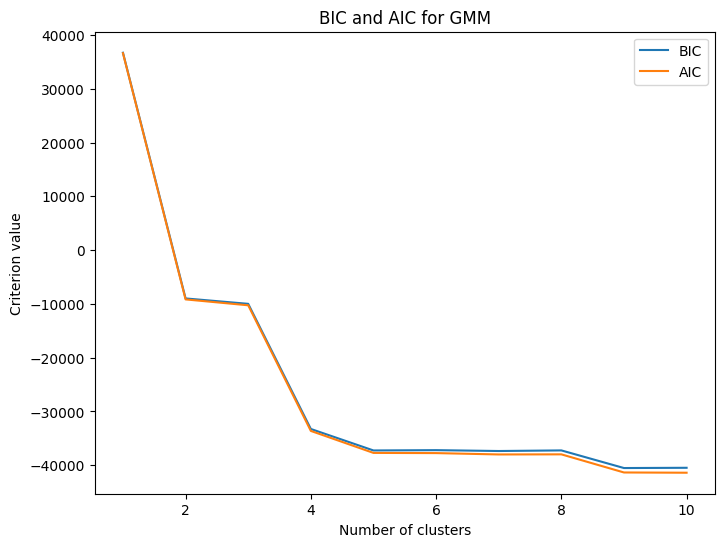

In [40]:
#figuring out the optimal number of clusters
# Compute BIC and AIC for different numbers of clusters
n_components_range = range(1, 11)
bic = []
aic = []
for n_components in n_components_range:
    # Initialize GaussianMixture with a higher reg_covar
    gmm = GaussianMixture(n_components=n_components, covariance_type="full", reg_covar=1e-4)
    gmm.fit(X_norm)
    bic.append(gmm.bic(X_norm))
    aic.append(gmm.aic(X_norm))

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic, label='BIC')
plt.plot(n_components_range, aic, label='AIC')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Criterion value')
plt.title('BIC and AIC for GMM')
plt.show()

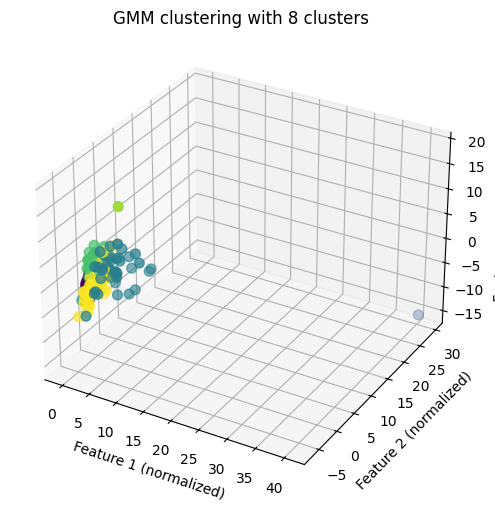

In [43]:

# Fit the final model with the chosen number of components and reg_covar
n_components = 8  # number of clusters, chosen based on BIC/AIC
gmm = GaussianMixture(n_components=n_components, covariance_type="full", reg_covar=1e-4)
gmm.fit(X_norm)

# Plot the data points and clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_norm[:, 0], X_norm[:, 1], X_norm[:, 2], c=gmm.predict(X_norm), cmap='viridis', s=50)
ax.set_xlabel('Feature 1 (normalized)')
ax.set_ylabel('Feature 2 (normalized)')
ax.set_zlabel('Feature 3 (normalized)')
ax.set_title('GMM clustering with {} clusters'.format(n_components))
plt.show()


In [44]:
# Predict the cluster for each data point
clusters = gmm.predict(X_norm)

# Calculate the size of each cluster
cluster_sizes = np.bincount(clusters, minlength=gmm.n_components)

# Display the statistics for each cluster
for i in range(gmm.n_components):
    print(f"Cluster {i}:")
    print(f"  Size: {cluster_sizes[i]}")
    print()  # Add a blank line for better readability

Cluster 0:
  Size: 274

Cluster 1:
  Size: 1841

Cluster 2:
  Size: 1

Cluster 3:
  Size: 38

Cluster 4:
  Size: 1098

Cluster 5:
  Size: 171

Cluster 6:
  Size: 1

Cluster 7:
  Size: 57



In [46]:
# Add the cluster assignments to the original dataframe
zip_df['Cluster'] = clusters

# Now you can calculate statistics for each cluster in the original data
cluster_stats = zip_df.groupby('Cluster').mean(numeric_only=True)

print(cluster_stats)


             nUsers    under65    5g_comp  totalClickDur     totalData  \
Cluster                                                                  
0        129.364964  11.423358  15.868613   2.542085e+06  8.819250e+09   
1          2.693102   0.090168   0.116784   1.630297e+04  4.378348e+07   
2         28.000000   9.000000  10.000000   2.145067e+06  3.601991e+11   
3        195.947368  19.684211  27.815789   7.008560e+06  4.067512e+10   
4         49.826047   4.060109   5.589253   7.634986e+05  2.172581e+09   
5        146.257310  13.356725  18.818713   4.255879e+06  1.509278e+10   
6        511.000000  61.000000  70.000000   2.712556e+07  8.280433e+10   
7        204.456140  18.929825  26.947368   4.907913e+06  2.040881e+10   

             totalDur    siteStream      siteWork      siteTech      siteEdu  \
Cluster                                                                        
0        5.206251e+06   1640.762774  4.103641e+05  5.355448e+05  3110.244526   
1        4.303770e+

Priority zone would be 80601: it has the highest use of streaming sites (176), game sites(933), work sites(80478), tech sites(81222), longest total click curation (612155), and highest number of schools(20).

Secondary priority zone, cluster 5: 31210, 10511, 94086, 13440.

In [48]:
cluster_6_zip_codes = zip_df[zip_df['Cluster'] == 6]['zipcode']

# Print the zip codes in cluster 0
print(cluster_6_zip_codes)

18    92802
Name: zipcode, dtype: object


In [50]:
cluster_7_zip_codes = zip_df[zip_df['Cluster'] == 7]['zipcode']

# Print the zip codes in cluster 0
print(cluster_7_zip_codes)

26     92626
39     90045
47     92620
51     95020
65     92109
77     95370
80     92395
83     92115
84     91709
98     95111
134    94128
144    91342
149    90630
153    91764
179    94534
183    92111
213    92592
243    94538
246    95678
258    95687
269    92507
285    91331
302    90066
317    91710
337    93065
340    92831
360    93309
379    92399
383    90250
387    92562
392    92373
393    91762
423    92804
439    95307
477    90049
479    90047
534    92345
537    93312
572    92584
584    95023
602    92234
667    92223
668    94553
675    92201
677    91702
707    92324
728    94597
770    90660
776    94533
779    95691
827    92376
838    95747
854    90034
862    95336
865    94401
976    94704
992    92625
Name: zipcode, dtype: object


In [51]:
len(cluster_7_zip_codes)

57

# Map Visualization

In [2]:
from uszipcode import SearchEngine
import folium

# Initialize the ZIP code search engine
search = SearchEngine()

# List of ZIP codes to geocode
# has been replaced already
zip_codes = ["80601","31210", "10511", "94086", "13440"]

# Initialize lists to store latitude and longitude data
latitude_data = []
longitude_data = []

for zipcode in zip_codes:
    result = search.by_zipcode(zipcode)
    if result:
        latitude_data.append(result.lat)
        longitude_data.append(result.lng)
    else:
        print(f"Could not geocode ZIP code: {zipcode}")

# print("Latitude data:", latitude_data)
# print("Longitude data:", longitude_data)

# Create a map centered around California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=7)

# Plot ZIP code points on the map
zip_codes = [(lat, lon) for lat, lon in zip(latitude_data, longitude_data)]
for lat, lon in zip_codes:
    folium.Marker([lat, lon], tooltip='ZIP Code').add_to(m)

# Save the map as an HTML file
m.save('zipcode_map.html')

m

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!
